In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

!pip install nltk
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', header=None, encoding='latin1')
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns = ['target','ids','date','flag','user','text']

In [ ]:
df = df[['text','target']]

In [ ]:
df['target'].unique()

array([0, 4])

In [ ]:
df['target'] = df['target'].replace(to_replace = 4, value = 1)
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
df.tail()

,text,target
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1
1599999,happy #charitytuesday @theNSPCC @SparksCharity...,1


<Axes: xlabel='target', ylabel='count'>

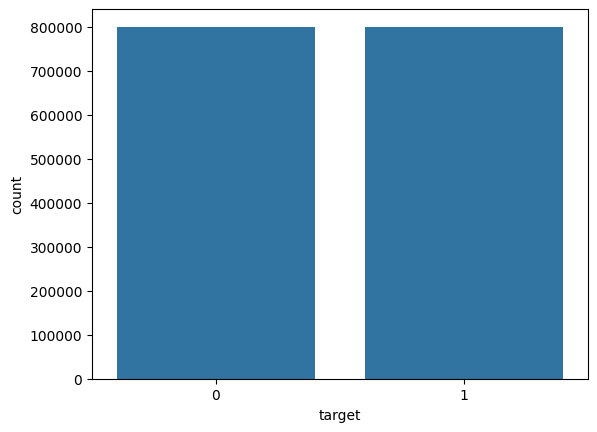

In [ ]:
sns.countplot(data= df, x = 'target')

In [ ]:
df_pos = df[df['target'] == 1].iloc[:200000]
df_neg = df[df['target'] == 0].iloc[:200000]
df_new = pd.concat([df_neg,df_pos], axis = 0)
df_new.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
from nltk.stem.porter import PorterStemmer

def stemming(content, stemmer):

    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)

    # Convert sentences into lowercase sentences and split each into words
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()

    # stop words
    stop_words = set(stopwords.words('english'))

    stemmed_content = [stemmer.stem(word) for word in stemmed_content if word not in stop_words]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [ ]:
stemmer = PorterStemmer()

# Apply stemming to the 'text' column in DataFrame
df_new['text'] = df_new['text'].apply(lambda x: stemming(x, stemmer))

df_new.head()

,text,target
0,switchfoot http twitpic com zl awww bummer sho...,0
1,upset updat facebook text might cri result sch...,0
2,kenichan dive mani time ball manag save rest g...,0
3,whole bodi feel itchi like fire,0
4,nationwideclass behav mad see,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new['text'], df_new['target'], stratify=df_new['target'], test_size=0.1)

vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

LogisticRegression:

train score is 0.811525, test score is 0.771425


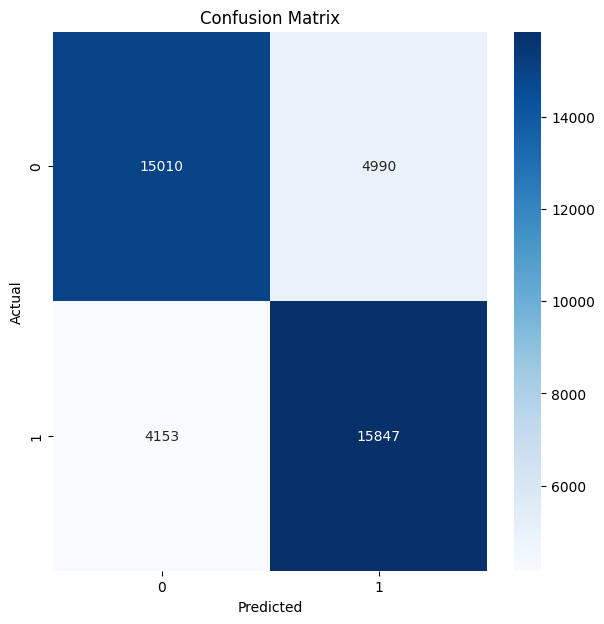

accuracy: 0.771425
classification report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     20000
           1       0.76      0.79      0.78     20000

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000
 


LinearSVC:

train score is 0.8836777777777778, test score is 0.7618


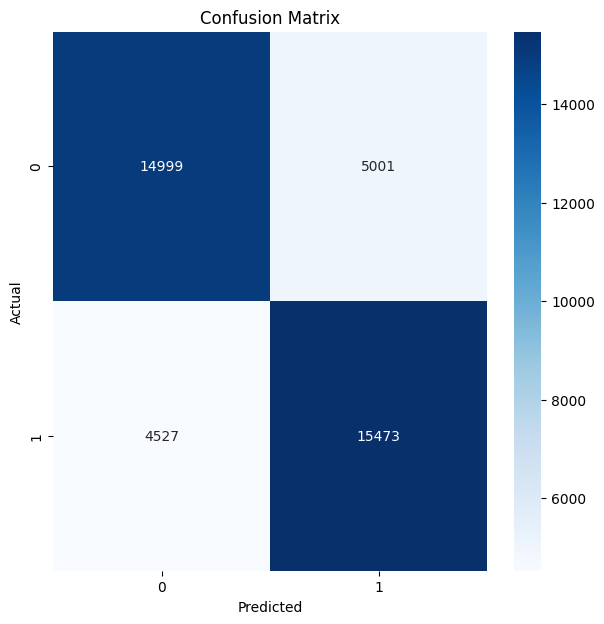

accuracy: 0.7618
classification report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     20000
           1       0.76      0.77      0.76     20000

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000
 




In [ ]:
def fit_predict(classifier, X_train, y_train, X_test, y_test):

    classifier.fit(X_train, y_train)

    # Score on train and test data
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)
    print(f'train score is {train_score}, test score is {test_score}')

    # model predict on test data

    test_prediction = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, test_prediction)
    cf_matrix = confusion_matrix(y_test, test_prediction)
    cl_report = classification_report(y_test, test_prediction)

    # Plot cm
    plt.figure(figsize=(7,7))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # accuracy and classification report
    print(f'accuracy: {accuracy}\nclassification report:\n{cl_report}', '\n\n')

    return classifier

# required models
models = {
    'LogisticRegression': LogisticRegression(),
    'LinearSVC': LinearSVC()
}

# Store the trained models
trained_models = {}

# perform model training and prediction
for name, model in models.items():
    print(f'{name}:\n')
    model = fit_predict(model, X_train_vec, y_train, X_test_vec, y_test)
